### Importing the libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
cf.go_offline()

### Importing the dataset

In [2]:
train = pd.read_csv('titanic_train.csv')

### Visualising the null data

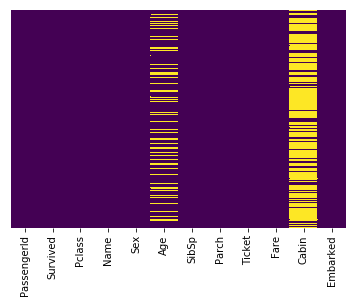

In [10]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Exploratory data analysis (EDA)

In [11]:
sns.set_style('whitegrid')

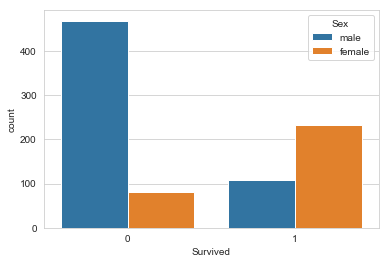

In [15]:
sns.countplot(x='Survived', data=train, hue='Sex')

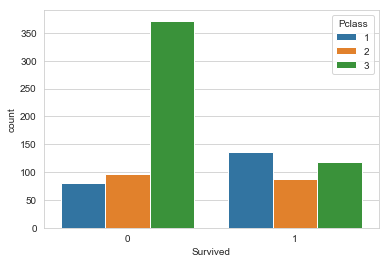

In [16]:
sns.countplot(x='Survived', data=train, hue='Pclass')

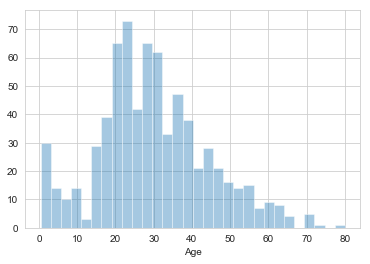

In [17]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

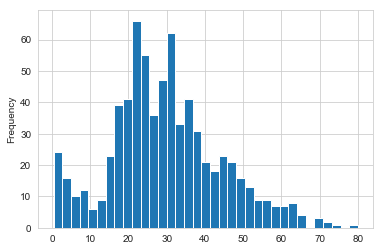

In [19]:
train['Age'].plot.hist(bins=35)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


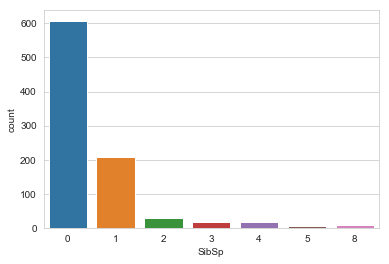

In [21]:
sns.countplot(x='SibSp', data=train)

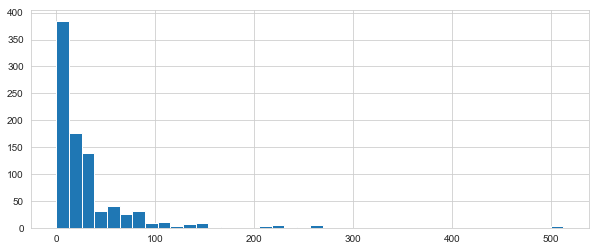

In [24]:
train['Fare'].hist(bins=40, figsize=(10, 4))

In [28]:
train['Fare'].iplot(kind='hist', bins=50)

### Cleaning the data

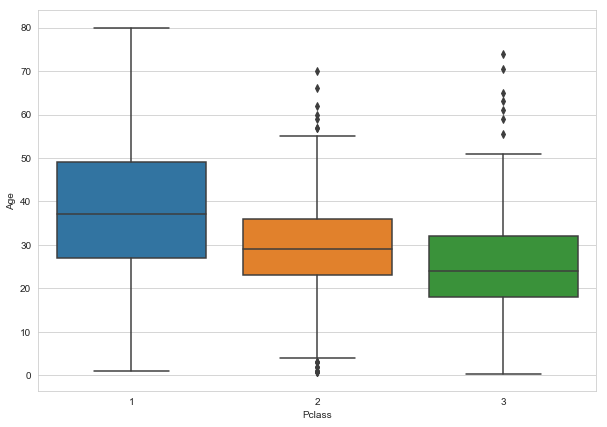

In [30]:
plt.figure(figsize=(10, 7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [31]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [33]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

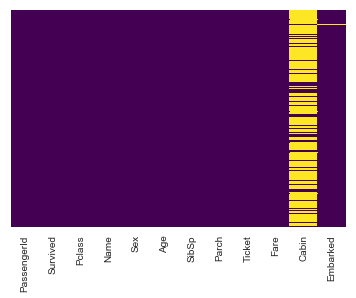

In [35]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [36]:
train.drop('Cabin', axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


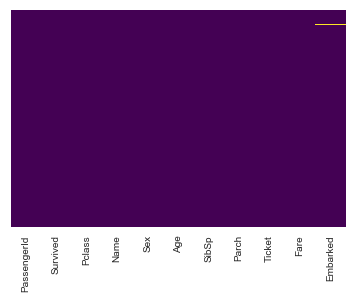

In [37]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [38]:
train.dropna(inplace=True)

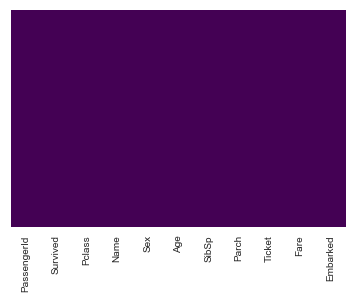

In [39]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### One hot encoding

In [42]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [44]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [45]:
train = pd.concat([train, sex, embark], axis=1)

In [46]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


### Removing some columns

In [48]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [51]:
train.drop('PassengerId', axis=1, inplace=True)

In [52]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


### We'll treat the train dataset as being the whole dataset, just to practice train test split

### Splitting the dataset

In [53]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Creating the model

In [57]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [61]:
y_pred = logmodel.predict(X_test)

In [66]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

   micro avg       0.81      0.81      0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [65]:
print(confusion_matrix(y_test, y_pred))

[[148  15]
 [ 36  68]]


In [67]:
print(f1_score(y_test, y_pred))

0.7272727272727274


In [71]:
from sklearn import metrics
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('Confusion matrix:\n', metrics.confusion_matrix(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Precision:', metrics.precision_score(y_test, y_pred))
print('Recall:', metrics.recall_score(y_test, y_pred))
print('f1-score:', metrics.f1_score(y_test, y_pred))
print('Clssification report:\n', classification_report(y_test, y_pred)) # Better for multiclass problem

Confusion matrix:
 [[148  15]
 [ 36  68]]
Accuracy: 0.8089887640449438
Precision: 0.8192771084337349
Recall: 0.6538461538461539
f1-score: 0.7272727272727274
Clssification report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

   micro avg       0.81      0.81      0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267

